In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layer
import tensorflow.keras as ker
from tensorflow.keras.regularizers import l2

In [ ]:
data=tf.keras.datasets.cifar10.load_data() 

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data

In [ ]:
print(" X train values and shape :")
#print(x_train[:1])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

 X train values and shape :
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
x_train = (x_train / 255.).reshape([-1,32,32,3])
x_test = (x_test / 255.).reshape([-1,32,32,3])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")
y_train.shape

(50000, 10)

In [ ]:
x_in=layer.Input((32,32,3))
arch= tf.keras.layers.UpSampling2D(size=(7,7))(x_in)
arch=layer.Conv2D(16,kernel_size=(3,3),padding='same')(arch)
arch=layer.Activation('relu')(arch)
arch=layer.BatchNormalization()(arch)
###### First Residual block
short=arch

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)


# short= layer.Conv2D(32, kernel_size=(1, 1), strides=(2,2), padding='same')(short)
# short= layer.BatchNormalization()(short)


arch=layer.Add()([short,conv])

conv_t=layer.Conv2D(16,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t=layer.Activation('relu')(conv_t)
arch=layer.BatchNormalization()(conv_t)
arch=layer.Dropout(0.2)(arch)



######### Second Residual Layer


short1=arch

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

short1= layer.Conv2D(32, kernel_size=(1, 1), strides=(1,1), padding='same')(short1)
short1 = layer.BatchNormalization()(short1)


arch=layer.Add()([short1,conv1])

conv_t_1=layer.Conv2D(32,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t_1=layer.Activation('relu')(conv_t_1)
arch=layer.BatchNormalization()(conv_t_1)
arch=layer.Dropout(0.2)(arch)



############ 3 Residual Layer


short2=arch

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

short2= layer.Conv2D(64, kernel_size=(1, 1), strides=(1,1), padding='same')(short2)
short2 = layer.BatchNormalization()(short2)

arch=layer.Add()([short2,conv2])


conv_t_2=layer.Conv2D(64,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t_2=layer.Activation('relu')(conv_t_2)
arch=layer.BatchNormalization()(conv_t_2)
arch=layer.Dropout(0.2)(arch)

######## End of residual layers 

arch=layer.AveragePooling2D()(arch)
arch=layer.Dropout(0.1)(arch)
arch=layer.Flatten()(arch)
arch=layer.Dense(512,activation='relu',kernel_regularizer=l2(0.01))(arch)
arch=layer.Dropout(0.5)(arch)
arch=layer.Dense(10,activation='softmax')(arch)

In [ ]:
model = ker.Model(inputs=x_in , outputs=arch)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),shuffle=True, epochs=50)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

Epoch 1/50
1563/1563 [==============================] - 513s 327ms/step - loss: 3.7428 - accuracy: 0.4140 - val_loss: 3.1307 - val_accuracy: 0.4356
Epoch 2/50
1563/1563 [==============================] - 513s 328ms/step - loss: 2.6471 - accuracy: 0.5368 - val_loss: 2.7017 - val_accuracy: 0.5322
Epoch 3/50
1563/1563 [==============================] - 513s 328ms/step - loss: 2.4727 - accuracy: 0.5999 - val_loss: 2.3832 - val_accuracy: 0.6010
Epoch 4/50
1563/1563 [==============================] - 513s 328ms/step - loss: 2.3106 - accuracy: 0.6247 - val_loss: 2.2827 - val_accuracy: 0.6063
Epoch 5/50
1563/1563 [==============================] - 514s 329ms/step - loss: 2.1447 - accuracy: 0.6440 - val_loss: 1.9636 - val_accuracy: 0.6747
Epoch 6/50
1563/1563 [==============================] - 513s 328ms/step - loss: 2.0339 - accuracy: 0.6639 - val_loss: 1.8765 - val_accuracy: 0.7094
Epoch 7/50
1563/1563 [==============================] - 513s 328ms/step - loss: 1.9521 - accuracy: 0.6764 - val_

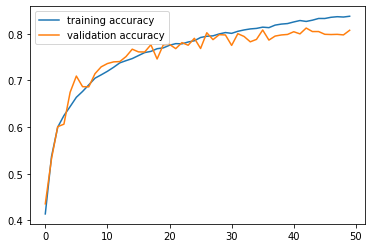

In [ ]:
epochs=list(range(50))
plt.plot(epochs,acc,label='training accuracy')
plt.plot(epochs,val_acc,label='validation accuracy')
plt.legend()
plt.show()

**CIFAR 100 Optimization:**

In [ ]:
data=tf.keras.datasets.cifar100.load_data() 

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data

In [ ]:
print(" X train values and shape :")
#print(x_train[:1])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

 X train values and shape :
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
x_train = (x_train / 255.).reshape([-1,32,32,3])
x_test = (x_test / 255.).reshape([-1,32,32,3])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")
y_train.shape

(50000, 10)

In [ ]:
x_in=layer.Input((32,32,3))
arch= tf.keras.layers.UpSampling2D(size=(7,7))(x_in)
arch=layer.Conv2D(16,kernel_size=(3,3),padding='same')(arch)
arch=layer.Activation('relu')(arch)
arch=layer.BatchNormalization()(arch)
###### First Residual block
short=arch

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)

conv=layer.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same')(conv)
conv=layer.Activation('relu')(conv)
conv=layer.BatchNormalization()(conv)


# short= layer.Conv2D(32, kernel_size=(1, 1), strides=(2,2), padding='same')(short)
# short= layer.BatchNormalization()(short)


arch=layer.Add()([short,conv])

conv_t=layer.Conv2D(16,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t=layer.Activation('relu')(conv_t)
arch=layer.BatchNormalization()(conv_t)
arch=layer.Dropout(0.2)(arch)



######### Second Residual Layer


short1=arch

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

conv1=layer.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same')(conv1)
conv1=layer.Activation('relu')(conv1)
conv1=layer.BatchNormalization()(conv1)

short1= layer.Conv2D(32, kernel_size=(1, 1), strides=(1,1), padding='same')(short1)
short1 = layer.BatchNormalization()(short1)


arch=layer.Add()([short1,conv1])

conv_t_1=layer.Conv2D(32,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t_1=layer.Activation('relu')(conv_t_1)
arch=layer.BatchNormalization()(conv_t_1)
arch=layer.Dropout(0.2)(arch)



############ 3 Residual Layer


short2=arch

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(arch)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

conv2=layer.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same')(conv2)
conv2=layer.Activation('relu')(conv2)
conv2=layer.BatchNormalization()(conv2)

short2= layer.Conv2D(64, kernel_size=(1, 1), strides=(1,1), padding='same')(short2)
short2 = layer.BatchNormalization()(short2)

arch=layer.Add()([short2,conv2])


conv_t_2=layer.Conv2D(64,kernel_size=(1,1),strides=(2,2),padding='same')(arch)
conv_t_2=layer.Activation('relu')(conv_t_2)
arch=layer.BatchNormalization()(conv_t_2)
arch=layer.Dropout(0.2)(arch)

######## End of residual layers 

arch=layer.AveragePooling2D()(arch)
arch=layer.Dropout(0.1)(arch)
arch=layer.Flatten()(arch)
arch=layer.Dense(1024,activation='relu',kernel_regularizer=l2(0.01))(arch)
arch=layer.Dropout(0.5)(arch)
arch=layer.Dense(100,activation='softmax')(arch)

In [ ]:
model = ker.Model(inputs=x_in , outputs=arch)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),shuffle=True, epochs=30)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

In [ ]:
epochs=list(range(50))
plt.plot(epochs,acc,label='training accuracy')
plt.plot(epochs,val_acc,label='validation accuracy')
plt.legend()
plt.show()